In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
EV_data = pd.read_csv(r"C:\Data Analysis - Files\Final Project\ev_battery_charging_data.csv")
EV_data.head()


,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,Fast,98.238981,Li-ion,112,Model B,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,Fast,97.562628,LiFePO4,398,Model A,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,Slow,97.233533,LiFePO4,175,Model A,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,Fast,98.136225,LiFePO4,150,Model B,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,Fast,97.662485,Li-ion,886,Model C,2


In [4]:
print (EV_data.shape)
EV_data = EV_data.dropna() # to remove duplicate
EV_data.info()

(1000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Degradation Rate (%)             1000 non-null   float64
 7   Charging Mode                    1000 non-null   object 
 8   Efficiency (%)                   1000 non-null   float64
 9   Battery Type                     1000 non-null   object 
 10  Charging Cycles                  1000 non-null   int64  
 11  EV Model                         1000 non-null   object 
 12  Optimal Ch

In [5]:
EV_data['Battery Power (W)'] = EV_data['Voltage (V)'] * EV_data['Current (A)']

In [6]:
EV_data['Charging Speed'] = EV_data['Current (A)'] / (EV_data['Charging Cycles'] + 1)

In [7]:
EV_data['Temp Diff'] = EV_data['Battery Temp (°C)'] - EV_data['Ambient Temp (°C)']

In [8]:
EV_data['Energy Efficiency Ratio'] = EV_data['Efficiency (%)'] / (EV_data['Charging Duration (min)'] + 1)

In [9]:
EV_data['Depth of Discharge (DOD) (%)'] = 100 - EV_data['SOC (%)']

In [10]:
EV_data['SoC Change Per Cycle'] = EV_data['SOC (%)'] / (EV_data['Charging Cycles'] + 1)

In [11]:
EV_data['Charging Stress'] = EV_data['Current (A)'] * EV_data['Battery Temp (°C)']

In [12]:
EV_data['Temperature Stress'] = EV_data['Temp Diff'] / (EV_data['Charging Duration (min)'] + 1)

In [14]:
EV_data['Battery Health (%)'] = 100 - EV_data['Degradation Rate (%)']

In [15]:
EV_data.head()

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,...,Optimal Charging Duration Class,Battery Power (W),Charging Speed,Temp Diff,Energy Efficiency Ratio,Depth of Discharge (DOD) (%),SoC Change Per Cycle,Charging Stress,Temperature Stress,Battery Health (%)
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,Fast,98.238981,Li-ion,...,1,121.785592,0.296934,7.014142,1.627455,56.291389,0.386802,1122.501184,0.116198,91.194904
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,Fast,97.562628,LiFePO4,...,1,125.023425,0.080772,4.824981,1.427532,4.435712,0.239509,1158.072264,0.070599,87.813140
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,Slow,97.233533,LiFePO4,...,2,376.420817,0.520244,-5.193861,0.913379,24.120545,0.431133,2289.929650,-0.048789,86.167664
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,Fast,98.136225,LiFePO4,...,1,130.244235,0.214961,14.419484,1.784281,36.120736,0.423041,1054.840902,0.262170,90.681126
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,Fast,97.662485,Li-ion,...,2,140.128769,0.038868,13.449930,0.904576,75.958322,0.027104,1083.733798,0.124577,88.312423


In [16]:
EV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Degradation Rate (%)             1000 non-null   float64
 7   Charging Mode                    1000 non-null   object 
 8   Efficiency (%)                   1000 non-null   float64
 9   Battery Type                     1000 non-null   object 
 10  Charging Cycles                  1000 non-null   int64  
 11  EV Model                         1000 non-null   object 
 12  Optimal Charging Dura

In [ ]:
##### Outier removal #####

In [64]:
# print object type columns

cat_columns = EV_data.select_dtypes(include=["object"]).columns
print("Categorical Columns:", cat_columns)


Categorical Columns: Index(['Charging Mode', 'Battery Type', 'EV Model'], dtype='object')


In [65]:
## One-Hot Encoding (OHE)

EV_data = pd.get_dummies(EV_data, columns=["Charging Mode",'Battery Type','EV Model'], drop_first=True)
EV_data.head()

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Efficiency (%),Charging Cycles,Optimal Charging Duration Class,Charging Mode_Normal,Charging Mode_Slow,Battery Type_LiFePO4,EV Model_Model B,EV Model_Model C
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,98.238981,112,1,False,False,False,True,False
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,97.562628,398,1,False,False,True,False,False
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,97.233533,175,2,False,True,True,False,False
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,98.136225,150,1,False,False,True,True,False
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,97.662485,886,2,False,False,False,False,True


In [ ]:
# Convert all boolean columns to int (0/1) # as for removing outlier it need tobe in integer type

EV_data = EV_data.astype({col: int for col in EV_data.select_dtypes(include=['bool']).columns})

EV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Degradation Rate (%)             1000 non-null   float64
 7   Efficiency (%)                   1000 non-null   float64
 8   Charging Cycles                  1000 non-null   int64  
 9   Optimal Charging Duration Class  1000 non-null   int64  
 10  Charging Mode_Normal             1000 non-null   int64  
 11  Charging Mode_Slow               1000 non-null   int64  
 12  Battery Type_LiFePO4 

<Figure size 1000x500 with 0 Axes>

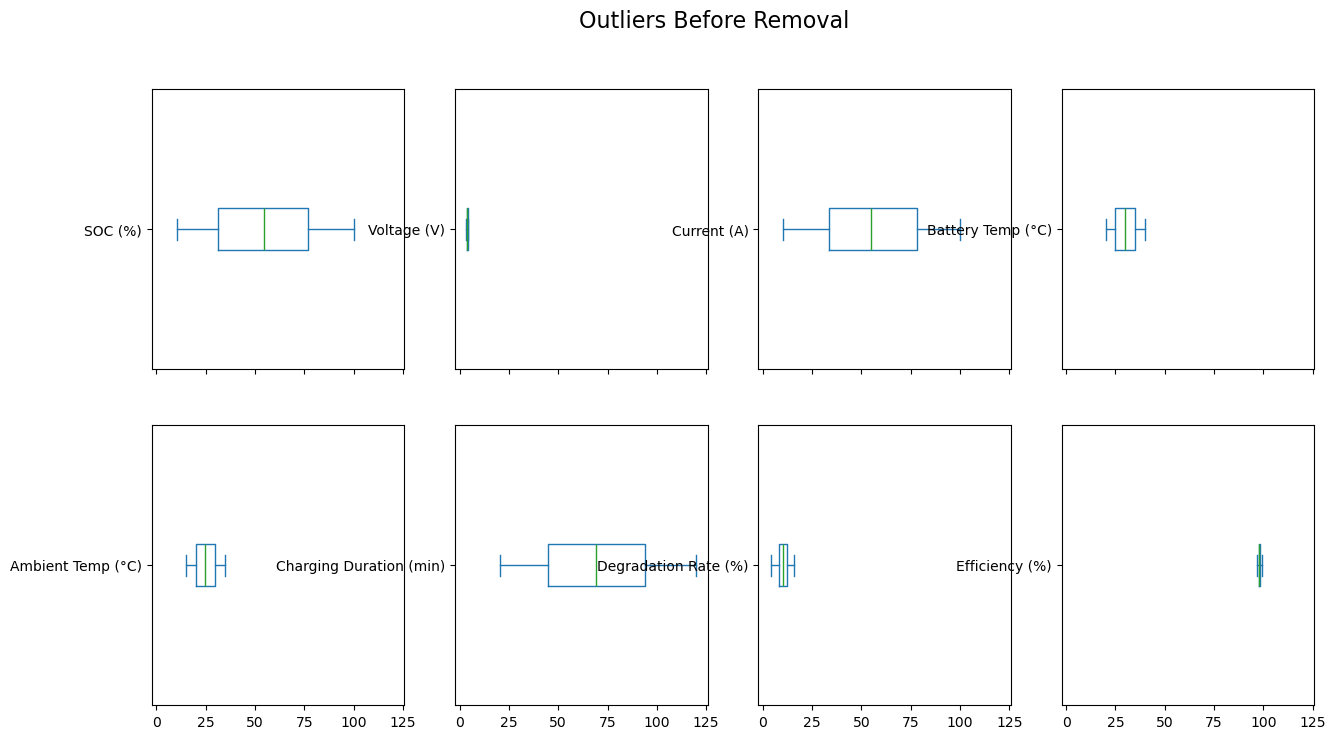

In [67]:
# Set plot size
plt.figure(figsize=(10, 5))

# Create boxplots for each numerical column
EV_data.select_dtypes(include=["float"]).plot(kind="box", subplots=True, layout=(2, 4), figsize=(15, 8), vert=False)

plt.suptitle("Outliers Before Removal", fontsize=16)
plt.show()

In [68]:
# Why use IQR?
# ✔ Robust to extreme outliers (not affected by large deviations).
# ✔ Works well for non-normal data distributions (common in battery data).
# ✔ Doesn't remove too many points unless there are significant outliers.

Q1 = EV_data.quantile(0.25)  # 25th percentile
Q3 = EV_data.quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
EV_Data_cleaned = EV_data[~((EV_data < lower_bound) | (EV_data > upper_bound)).any(axis=1)]

<Figure size 1000x500 with 0 Axes>

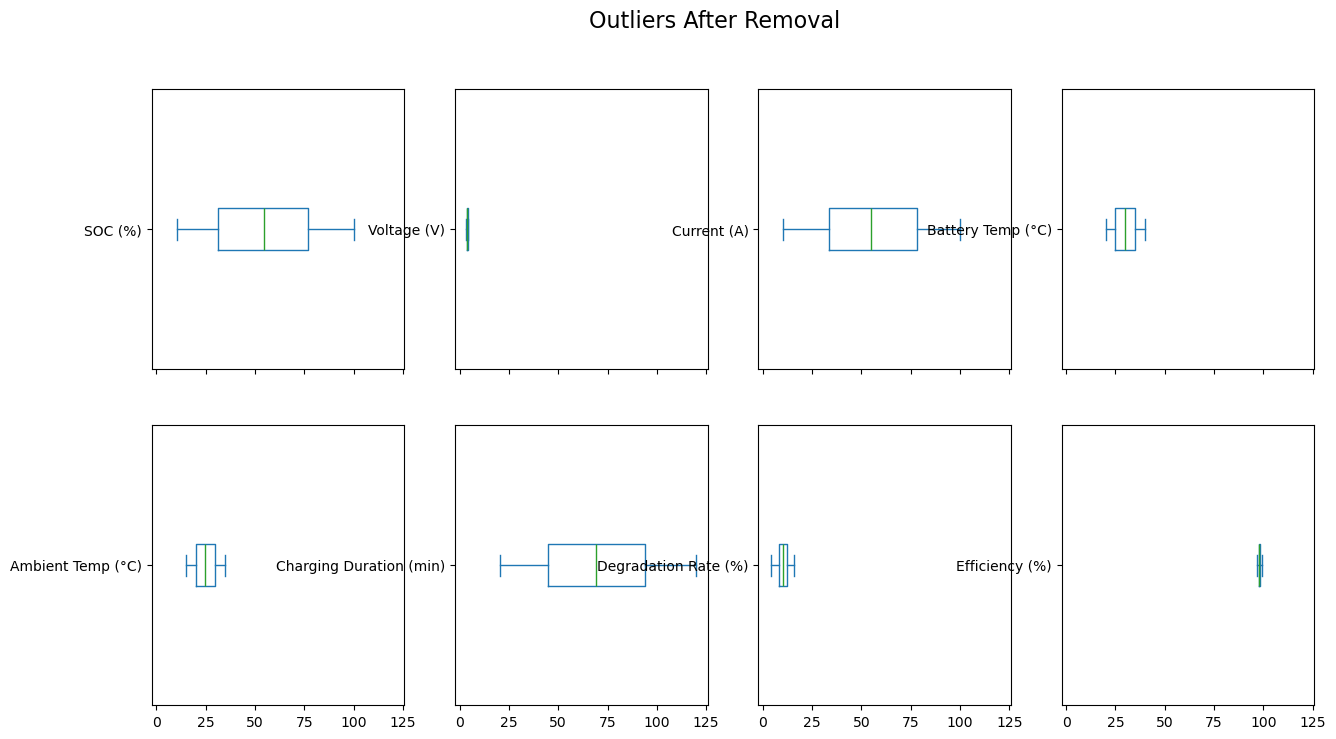

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Degradation Rate (%)             1000 non-null   float64
 7   Efficiency (%)                   1000 non-null   float64
 8   Charging Cycles                  1000 non-null   int64  
 9   Optimal Charging Duration Class  1000 non-null   int64  
 10  Charging Mode_Normal             1000 non-null   int64  
 11  Charging Mode_Slow               1000 non-null   int64  
 12  Battery Type_LiFePO4 

In [69]:
# Set plot size
plt.figure(figsize=(10, 5))

# Create boxplots for cleaned data
EV_Data_cleaned.select_dtypes(include=["float"]).plot(kind="box", subplots=True, layout=(2, 4), figsize=(15, 8), vert=False)

plt.suptitle("Outliers After Removal", fontsize=16)
plt.show()

EV_data.info()  ## there is no outlier

In [ ]:
# 📌 Why use Z-Score?
# ✔ Good for normally distributed data.
# ✔ More mathematically rigorous, using standard deviation as a measure.
# ❌ Not robust to skewed data (can remove valid extreme values in non-normal distributions).

from scipy import stats
EV_data = EV_data[(np.abs(stats.zscore(EV_data)) < 3).all(axis=1)]

EV_data.info()  ## there is no outlier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Degradation Rate (%)             1000 non-null   float64
 7   Efficiency (%)                   1000 non-null   float64
 8   Charging Cycles                  1000 non-null   int64  
 9   Optimal Charging Duration Class  1000 non-null   int64  
 10  Charging Mode_Normal             1000 non-null   int64  
 11  Charging Mode_Slow               1000 non-null   int64  
 12  Battery Type_LiFePO4 